<a href="https://colab.research.google.com/github/klnsuman/DeepLearning/blob/master/Assignment_VisionDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
print("hello")

hello


# 1 Adding GPU


In [3]:
!nvidia-smi

Sun Oct 18 12:29:20 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.23.05    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# 2 Import Required Packages 

In [88]:
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import models

import random
import numpy as np

import pickle
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

# 3 Connecting to Google Drive

In [89]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '1tnQPfAconuACqRfIm0lC7zwJFd0LFj8N'
downloaded = drive.CreateFile({'id': file_id})
print('Downloaded content "{}"'.format(downloaded.GetContentString()))

Downloaded content "Hellow World"


# 4 Mount Google Drive

In [90]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 5  Pre Process the Image Batch Data 

In [91]:
def unpickle(file):
    
  with open(file, 'rb') as fo:
    dict = pickle.load(fo, encoding='bytes')
    return dict

   #
      **Change Directory in Google Drive to point to Batch Files**

In [92]:
import os
os.chdir('/content/drive/My Drive/cifar-10-batches-py/')

In [93]:
!ls -lrt

total 181856
-rw------- 1 root root 31035526 Mar 31  2009 test_batch
-rw------- 1 root root 31035999 Mar 31  2009 data_batch_3
-rw------- 1 root root 31035320 Mar 31  2009 data_batch_2
-rw------- 1 root root 31035623 Mar 31  2009 data_batch_5
-rw------- 1 root root 31035704 Mar 31  2009 data_batch_1
-rw------- 1 root root 31035696 Mar 31  2009 data_batch_4
-rw------- 1 root root       88 Jun  4  2009 readme.html
-rw------- 1 root root      158 Oct  9 09:21 batches.meta
drwx------ 2 root root     4096 Oct 12 09:32 saved_models




> **Unpickle**



In [94]:
#data_dir = '/content/drive/"My Drive"/cifar-10-batches-py/'
batch1=unpickle('data_batch_1')

batch2=unpickle('data_batch_2')
batch3=unpickle('data_batch_3')
batch4=unpickle('data_batch_4')
batch5=unpickle('data_batch_5')



In [95]:
!ls -lrt /content/drive/"My Drive"/cifar-10-batches-py/

total 181856
-rw------- 1 root root 31035526 Mar 31  2009 test_batch
-rw------- 1 root root 31035999 Mar 31  2009 data_batch_3
-rw------- 1 root root 31035320 Mar 31  2009 data_batch_2
-rw------- 1 root root 31035623 Mar 31  2009 data_batch_5
-rw------- 1 root root 31035704 Mar 31  2009 data_batch_1
-rw------- 1 root root 31035696 Mar 31  2009 data_batch_4
-rw------- 1 root root       88 Jun  4  2009 readme.html
-rw------- 1 root root      158 Oct  9 09:21 batches.meta
drwx------ 2 root root     4096 Oct 12 09:32 saved_models




> **Read Input From Batch Files**



In [96]:
import numpy as np
def cifar_10_reshape(batch_arg):
    output=np.reshape(batch_arg,(10000,3,32,32)).transpose(0,2,3,1)
    return output

batch1_data=cifar_10_reshape(batch1[b'data'])
batch2_data=cifar_10_reshape(batch2[b'data'])
batch3_data=cifar_10_reshape(batch3[b'data'])
batch4_data=cifar_10_reshape(batch4[b'data'])
batch5_data=cifar_10_reshape(batch5[b'data'])

batch1_labels=batch1[b'labels']
batch2_labels=batch2[b'labels']
batch3_labels=batch3[b'labels']
batch4_labels=batch4[b'labels']
batch5_labels=batch5[b'labels']

In [97]:
print(len(batch1_data))
print(len(batch2_data))
print(len(batch3_data))
print(len(batch4_data))
print(len(batch5_data))

10000
10000
10000
10000
10000


In [108]:
batch1_data.shape

(10000, 32, 32, 3)

In [98]:
os.listdir()

['test_batch',
 'data_batch_3',
 'data_batch_2',
 'data_batch_5',
 'data_batch_1',
 'data_batch_4',
 'readme.html',
 'batches.meta',
 'saved_models']


> **PreProcess Test Data** 



In [99]:
data_dir = '/content/drive/"My Drive"/cifar-10-batches-py/'
batch1=unpickle('test_batch')

test_batch=unpickle('test_batch')
test_images=cifar_10_reshape(test_batch[b'data'])
test_labels_data=test_batch[b'labels']


In [100]:
train_images=np.concatenate((batch1_data,batch2_data,batch3_data,batch4_data,batch5_data),axis=0)
train_labels_data=np.concatenate((batch1_labels,batch2_labels,batch3_labels,batch4_labels,batch5_labels),axis=0)

In [101]:
train_images.shape 

(50000, 32, 32, 3)

In [102]:
!ls

batches.meta  data_batch_2  data_batch_4  readme.html	test_batch
data_batch_1  data_batch_3  data_batch_5  saved_models




```
```
# Label Info
```
```
```
airplane    0
automobile  1
bird        2
cat         3
deer        4
dog         5
frog        6
horse       7
ship        8
truck       9
```



# 6 Data Visualization

In [103]:
import matplotlib.pyplot as plt
# Print Sample Data
batch1_data[1][1][1:5]

array([[145, 153, 154],
       [125, 125, 118],
       [124, 129, 132],
       [150, 161, 173]], dtype=uint8)



 > # 6.1 **Print first image** 



Image Label 9


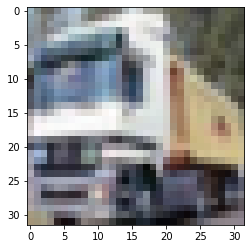

In [105]:
# Image 1 => in batch 1 is => Bus 
batch1_data_255 = batch1_data
print("Image Label",batch1_labels[1])
g = plt.imshow(batch1_data_255[1])




> # 6.2 **Print Second Image** 



Image Label 9


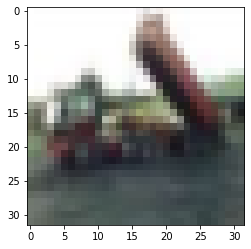

In [106]:
# Image 2 => is Truck
print("Image Label",batch1_labels[2])
g = plt.imshow(batch1_data_255[2])


Image Label 4


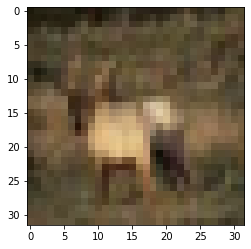

In [21]:
# image 3 => is deer
print("Image Label",batch1_labels[3])
from matplotlib import pyplot  
pyplot.imshow(batch1_data[3])

pyplot.show()

In [23]:
%matplotlib inline
from __future__ import print_function
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

In [24]:
(trainX, trainy), (testX, testy) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step




> # 6.3 Print Images From Batch 1 



Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


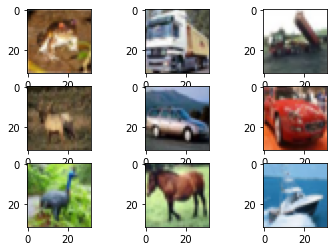

In [110]:
  
from matplotlib import pyplot
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
  
	pyplot.imshow(batch1_data[i])
# show the figure
pyplot.show()



> #  6.4 Print Images from Batch 2 



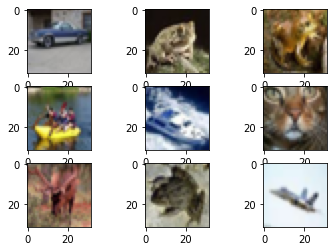

In [111]:
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
  
	pyplot.imshow(batch2_data[i])
# show the figure
pyplot.show()



> #  6.5 Print Images from Batch 3 



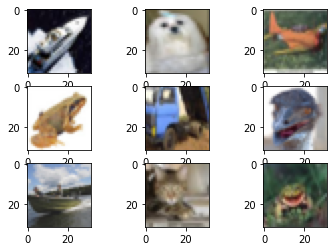

In [112]:
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
  
	pyplot.imshow(batch3_data[i])
# show the figure
pyplot.show()



  > #  6.5 Print Images from Batch 4 



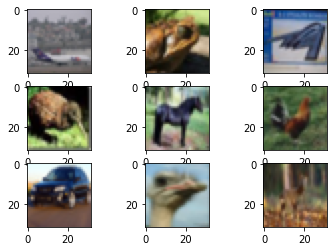

In [113]:
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
  
	pyplot.imshow(batch4_data[i])
# show the figure
pyplot.show()



> #  6.6 Print Images from Batch 5 



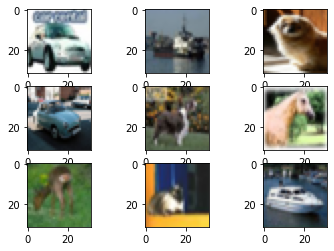

In [114]:
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
  
	pyplot.imshow(batch5_data[i])
# show the figure
pyplot.show()

#  **7 DNN Model**


In [153]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

print(y_train.shape, 'train samples')
print(y_test.shape, 'test samples')


#print(train_labels_data.shape, 'train samples')
#print(test_labels_data.shape, 'test samples')
print(train_images.shape, 'train samples')
print(test_images.shape, 'test samples')

print("t",type(train_images))
print("t1",type(x_train))

print("l",type(y_train))
print("l1",type(train_labels_data))


#test_labels_data = np.ndarray([test_labels_data],np.int32)

it = iter(test_labels_data) 
x = np.fromiter(it, dtype = np.int32) 

#train_images,test_images,train_labels_data,,test_labels_data
train_labels_data = train_labels_data.reshape(50000,1)
test_labels_data = x.reshape(10000,1)

#test_labels_data = test_labels_data.reshape(50000,1)
print("t_l",train_labels_data.shape)
print("t_l1", test_labels_data.shape)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
(50000, 1) train samples
(10000, 1) test samples
(50000, 32, 32, 3) train samples
(10000, 32, 32, 3) test samples
t <class 'numpy.ndarray'>
t1 <class 'numpy.ndarray'>
l <class 'numpy.ndarray'>
l1 <class 'numpy.ndarray'>
t_l (50000, 1)
t_l1 (10000, 1)


In [125]:
#x_train
#train_labels_data
#train_images
#y_train

# train_images,train_labels_data,test_images,test_labels_data

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [157]:
'''Xtrain = x_train.reshape((50000, 32*32*3))    # reshape the input set to size 32*32. VEctor of length 784
Xtrain = Xtrain.astype('float32')/255      # normalize to grayscale; set datatype as float32

Xtest = x_test.reshape((10000, 32*32*3))      # reshape the input set to size 28*28. 
Xtest = Xtest.astype('float32')/255        # normalize to grayscale; set datatype as float32

Ytrain = tf.keras.utils.to_categorical(y_train,10)
Ytest = tf.keras.utils.to_categorical(y_test,10)'''

Xtrain = train_images.reshape((50000, 32*32*3))    # reshape the input set to size 32*32. VEctor of length 784
Xtrain = Xtrain.astype('float32')/255      # normalize to grayscale; set datatype as float32

Xtest = test_images.reshape((10000, 32*32*3))      # reshape the input set to size 28*28. 
Xtest = Xtest.astype('float32')/255        # normalize to grayscale; set datatype as float32

Ytrain = tf.keras.utils.to_categorical(train_labels_data,10)
Ytest = tf.keras.utils.to_categorical(test_labels_data,10)


In [158]:
#Defining function for confusion matrix plot
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):

    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    #Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#print(cm)

    fig, ax = plt.subplots(figsize=(7,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')


    #Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

np.set_printoptions(precision=2)

In [159]:
# create Model object
dnnModel = models.Sequential()

Add **Layers**

# Model 1 Without Regularization

In [160]:
# Layer 1 = input layer
# specify the input size in the first layer.

dnnModel.add(layers.Dense(64, activation='relu', input_shape= (32*32*3,)))
#dnnModel.add(Flatten())
# Layer 2 = hidden layer 
dnnModel.add(layers.Dense(256, activation='relu'))
dnnModel.add(layers.Dense(128, activation='relu'))
# Layer 3 = hidden layer 
dnnModel.add(layers.Dense(128, activation='relu'))
# Layer 4 = hidden layer 
dnnModel.add(layers.Dense(32, activation='relu'))
#dnnModel.add(Flatten())
# Layer 4 = output layer
dnnModel.add(layers.Dense(10, activation='softmax'))

dnnModel.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_88 (Dense)             (None, 64)                196672    
_________________________________________________________________
dense_89 (Dense)             (None, 256)               16640     
_________________________________________________________________
dense_90 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_91 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_92 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_93 (Dense)             (None, 10)                330       
Total params: 267,178
Trainable params: 267,178
Non-trainable params: 0
_______________________________________________

**Set Model Parameters - Define Optimizer to be Used , Loss Metric to be Used , Evaluation Metrics**

In [161]:
dnnModel.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'] )

In [163]:
# train Model
h  = dnnModel.fit( Xtrain, Ytrain, epochs=125, batch_size=50,validation_split=0.2)

Epoch 1/125
800/800 [==============================] - 3s 4ms/step - loss: 0.9537 - accuracy: 0.6837 - val_loss: 2.7858 - val_accuracy: 0.4372
Epoch 2/125
800/800 [==============================] - 3s 3ms/step - loss: 0.6743 - accuracy: 0.7564 - val_loss: 2.9004 - val_accuracy: 0.4334
Epoch 3/125
800/800 [==============================] - 3s 3ms/step - loss: 0.6221 - accuracy: 0.7762 - val_loss: 2.8162 - val_accuracy: 0.4347
Epoch 4/125
800/800 [==============================] - 3s 4ms/step - loss: 0.6016 - accuracy: 0.7822 - val_loss: 2.8335 - val_accuracy: 0.4374
Epoch 5/125
800/800 [==============================] - 3s 4ms/step - loss: 0.6234 - accuracy: 0.7753 - val_loss: 2.8616 - val_accuracy: 0.4323
Epoch 6/125
800/800 [==============================] - 3s 4ms/step - loss: 0.5866 - accuracy: 0.7865 - val_loss: 2.9959 - val_accuracy: 0.4346
Epoch 7/125
800/800 [==============================] - 3s 4ms/step - loss: 0.5951 - accuracy: 0.7845 - val_loss: 2.9179 - val_accuracy: 0.4388

In [164]:
print('Final training loss \t', h.history['loss'][-1])
print('Final training accuracy ', h.history['accuracy'][-1])

Final training loss 	 0.3620411157608032
Final training accuracy  0.8706750273704529


Test loss for Keras ReLU : 4.4158406257629395 / Test accuracy: 0.42890000343322754


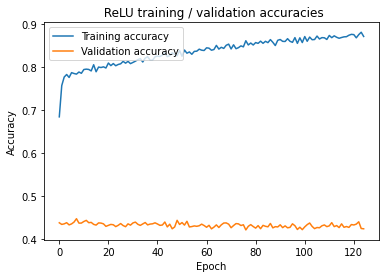

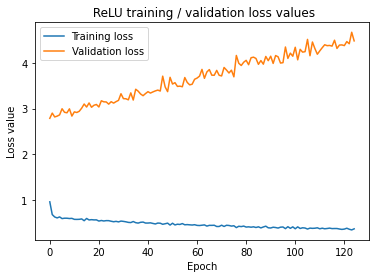

In [165]:
# Generate generalization metrics
score = dnnModel.evaluate(Xtest, Ytest, verbose=0)
print(f'Test loss for Keras ReLU : {score[0]} / Test accuracy: {score[1]}')

# Visualize model history
plt.plot(h.history['accuracy'], label='Training accuracy')
plt.plot(h.history['val_accuracy'], label='Validation accuracy')
plt.title(' ReLU training / validation accuracies')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(h.history['loss'], label='Training loss')
plt.plot(h.history['val_loss'], label='Validation loss')
plt.title(' ReLU training / validation loss values')
plt.ylabel('Loss value')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

Confusion matrix, without normalization


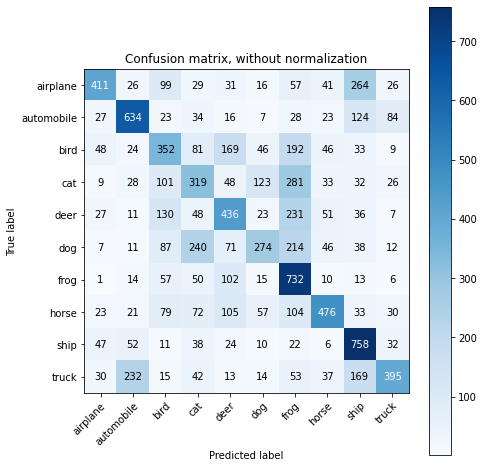

In [166]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Predict the values from the validation dataset

y_pred=dnn_mod_reg2.predict_classes(Xtest)
y_true=np.argmax(Ytest,axis=1)

# compute the confusion matrix
#confusion_mtx = confusion_matrix(y_true,y_pred) 
class_names=['airplane',
'automobile',
'bird',        
'cat' ,        
'deer' ,       
'dog' ,        
'frog' ,       
'horse' ,      
'ship'   ,     
'truck'       ]

plot_confusion_matrix(y_true, y_pred, classes = class_names, title='Confusion matrix, without normalization')



# Model 2 - With Regularization

In [167]:
from keras.regularizers import l2
from tensorflow.keras import regularizers
# create Model object
dnn_mod_reg1 = models.Sequential()
# Layer 1 = input layer
# specify the input size in the first layer.

dnn_mod_reg1.add(layers.Dense(64, activation='relu', input_shape= (32*32*3,),kernel_regularizer=regularizers.l2(0.001),activity_regularizer=regularizers.l2(0.001)))
dnnModel.add(Flatten())
# Layer 2 = hidden layer 
dnn_mod_reg1.add(layers.Dense(256, activation='relu'))
dnn_mod_reg1.add(layers.Dense(128, activation='relu'))
# Layer 3 = hidden layer 
dnn_mod_reg1.add(layers.Dense(64, activation='relu'))
# Layer 4 = hidden layer 
dnn_mod_reg1.add(layers.Dense(32, activation='relu'))
#dnnModel.add(Flatten())
# Layer 4 = output layer
dnn_mod_reg1.add(layers.Dense(10, activation='softmax'))

dnn_mod_reg1.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_94 (Dense)             (None, 64)                196672    
_________________________________________________________________
dense_95 (Dense)             (None, 256)               16640     
_________________________________________________________________
dense_96 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_97 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_98 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_99 (Dense)             (None, 10)                330       
Total params: 256,874
Trainable params: 256,874
Non-trainable params: 0
_______________________________________________

In [168]:
# Convert class vectors to binary class matrices.
#y_train = keras.utils.to_categorical(y_train, num_classes)
#y_test = keras.utils.to_categorical(y_test, num_classes)
dnn_mod_reg1.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'] )

In [169]:

# train Model
hist  = dnn_mod_reg1.fit( Xtrain, Ytrain, epochs=125, batch_size=100,validation_split=0.2)

Epoch 1/125
400/400 [==============================] - 2s 4ms/step - loss: 2.0782 - accuracy: 0.2203 - val_loss: 1.9664 - val_accuracy: 0.2409
Epoch 2/125
400/400 [==============================] - 1s 3ms/step - loss: 1.9559 - accuracy: 0.2520 - val_loss: 2.0156 - val_accuracy: 0.2472
Epoch 3/125
400/400 [==============================] - 1s 4ms/step - loss: 1.9495 - accuracy: 0.2544 - val_loss: 2.0107 - val_accuracy: 0.2435
Epoch 4/125
400/400 [==============================] - 1s 4ms/step - loss: 1.9406 - accuracy: 0.2565 - val_loss: 1.9453 - val_accuracy: 0.2663
Epoch 5/125
400/400 [==============================] - 1s 4ms/step - loss: 1.9375 - accuracy: 0.2570 - val_loss: 1.9350 - val_accuracy: 0.2666
Epoch 6/125
400/400 [==============================] - 1s 4ms/step - loss: 1.9373 - accuracy: 0.2579 - val_loss: 1.9633 - val_accuracy: 0.2534
Epoch 7/125
400/400 [==============================] - 1s 4ms/step - loss: 1.9304 - accuracy: 0.2616 - val_loss: 1.9514 - val_accuracy: 0.2636

Test loss for Keras ReLU With Regularization: 2.0112149715423584 / Test accuracy: 0.2556999921798706


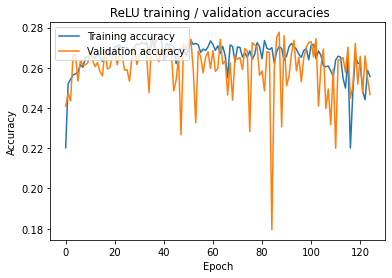

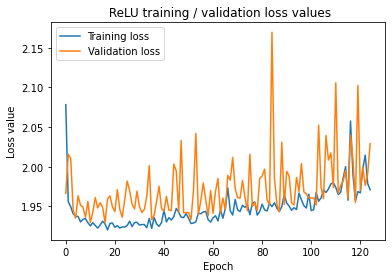

In [177]:
# Generate generalization metrics
score = dnn_mod_reg1.evaluate(Xtest, Ytest, verbose=0)
print(f'Test loss for Keras ReLU With Regularization: {score[0]} / Test accuracy: {score[1]}')

# Visualize model history
plt.plot(hist.history['accuracy'], label='Training accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation accuracy')
plt.title(' ReLU training / validation accuracies')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(hist.history['loss'], label='Training loss')
plt.plot(hist.history['val_loss'], label='Validation loss')
plt.title(' ReLU training / validation loss values')
plt.ylabel('Loss value')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

In [178]:
print('Final training loss \t', hist.history['loss'][-1])
print('Final training accuracy ', hist.history['accuracy'][-1])

Final training loss 	 1.9709805250167847
Final training accuracy  0.2556999921798706


Confusion matrix, without normalization


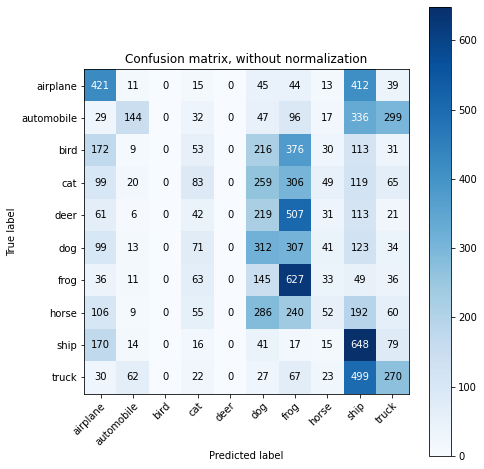

In [176]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Predict the values from the validation dataset

y_pred=dnn_mod_reg1.predict_classes(Xtest)
y_true=np.argmax(Ytest,axis=1)

# compute the confusion matrix
#confusion_mtx = confusion_matrix(y_true,y_pred) 
class_names=['airplane',
'automobile',
'bird',        
'cat' ,        
'deer' ,       
'dog' ,        
'frog' ,       
'horse' ,      
'ship'   ,     
'truck'       ]

plot_confusion_matrix(y_true, y_pred, classes = class_names, title='Confusion matrix, without normalization')



> # **Model 3 With Regularization and Drop Out** 



In [171]:
from keras.regularizers import l2
from tensorflow.keras import regularizers
# create Model object

from keras import optimizers
dnn_mod_reg2 = Sequential()  
#dnn_mod_reg2.add(Flatten(32*32*3,))  
dnn_mod_reg2.add(layers.Dense(64, input_shape= (32*32*3,),activation=keras.layers.LeakyReLU(alpha=0.3),kernel_regularizer=regularizers.l2(0.001),activity_regularizer=regularizers.l2(0.001)))  
dnn_mod_reg2.add(Dropout(0.5))  
dnn_mod_reg2.add(layers.Dense(256, activation=keras.layers.LeakyReLU(alpha=0.3)))  
dnn_mod_reg2.add(Dropout(0.3)) 
dnn_mod_reg2.add(layers.Dense(128, activation=keras.layers.LeakyReLU(alpha=0.3)))
dnn_mod_reg2.add(layers.Dense(128, activation=keras.layers.LeakyReLU(alpha=0.3)))
# Layer 3 = hidden layer 
dnn_mod_reg2.add(layers.Dense(64, activation=keras.layers.LeakyReLU(alpha=0.3)))
# Layer 4 = hidden layer 
dnn_mod_reg2.add(layers.Dense(32, activation=keras.layers.LeakyReLU(alpha=0.3)))
dnn_mod_reg2.add(layers.Dense(10, activation='softmax'))  
dnn_mod_reg2.summary()

dnn_mod_reg2.compile(loss='categorical_crossentropy',
   optimizer=optimizers.RMSprop(lr=1e-4),
   metrics=['accuracy'])
history = dnn_mod_reg2.fit(Xtrain, Ytrain, 
   epochs=125,
   batch_size=64, 
   validation_split=0.2)


Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_100 (Dense)            (None, 64)                196672    
_________________________________________________________________
dropout_28 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_101 (Dense)            (None, 256)               16640     
_________________________________________________________________
dropout_29 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_102 (Dense)            (None, 128)               32896     
_________________________________________________________________
dense_103 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_104 (Dense)            (None, 64)              

In [172]:
print('Final training loss \t', history.history['loss'][-1])
print('Final training accuracy ', history.history['accuracy'][-1])

Final training loss 	 1.5200605392456055
Final training accuracy  0.47780001163482666


Test loss for Keras ReLU With Regularization: 1.4432320594787598 / Test accuracy: 0.5067999958992004


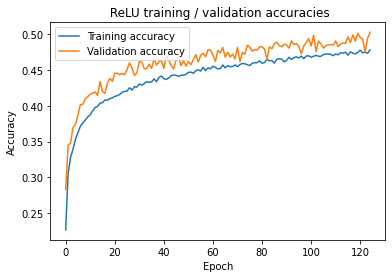

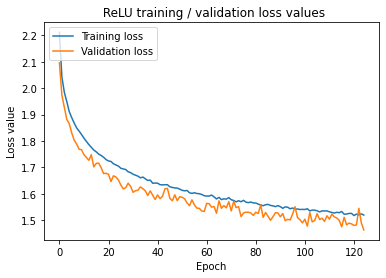

In [173]:
# Generate generalization metrics
score = dnn_mod_reg2.evaluate(Xtest, Ytest, verbose=0)
print(f'Test loss for Keras ReLU With Regularization: {score[0]} / Test accuracy: {score[1]}')

# Visualize model history
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title(' ReLU training / validation accuracies')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title(' ReLU training / validation loss values')
plt.ylabel('Loss value')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

In [174]:
print(x_test.shape)

(10000, 32, 32, 3)


Confusion matrix, without normalization


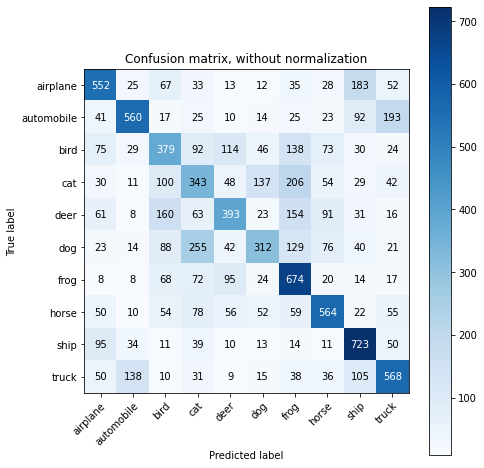

In [175]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Predict the values from the validation dataset

y_pred=dnn_mod_reg2.predict_classes(Xtest)
y_true=np.argmax(Ytest,axis=1)

# compute the confusion matrix
#confusion_mtx = confusion_matrix(y_true,y_pred) 
class_names=['airplane',
'automobile',
'bird',        
'cat' ,        
'deer' ,       
'dog' ,        
'frog' ,       
'horse' ,      
'ship'   ,     
'truck'       ]

plot_confusion_matrix(y_true, y_pred, classes = class_names, title='Confusion matrix, without normalization')

